In [1]:
#Importing Librarries

In [2]:
!pip install mlxtend

^C


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder



  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached matplotlib-3.5.3-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached numpy-1.23.2-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached Pillow-9.2.0-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
ppscore 1.2.0 requires scikit-learn<1.0.0,>=0.20.2, but you have scikit-learn 1.1.2 which is incompatible.


In [5]:
titanic = pd.read_csv("C:/Users/chira/Downloads/Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


## Pre processing 
As the data is not int in tarnsaction form we use the transaction encoder

In [6]:
df = pd.get_dummies(titanic)
df.head()



,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


## Apriori Algorithm 


In [7]:
frequent_itemsets = apriori(df, min_supt = 0.6,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Age_Adult, Gender_Male)"
4,0.619718,"(Gender_Male, Survived_No)"
5,0.653339,"(Age_Adult, Survived_No)"
6,0.603816,"(Age_Adult, Gender_Male, Survived_No)"


In [9]:
rules =  association_rules(frequent_itemsets,metric='lift',min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
1,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
4,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
5,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
6,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
7,"(Age_Adult, Survived_No)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
8,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
9,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660


In [10]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
11,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337
7,"(Age_Adult, Survived_No)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
10,(Gender_Male),"(Age_Adult, Survived_No)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
8,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
9,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
4,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
5,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023


In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
1,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
4,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
5,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
6,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
7,"(Age_Adult, Survived_No)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
8,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
9,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

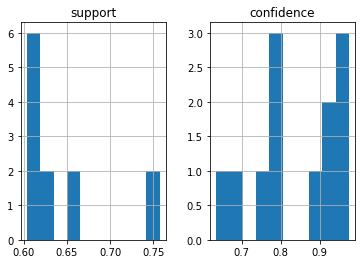

In [12]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

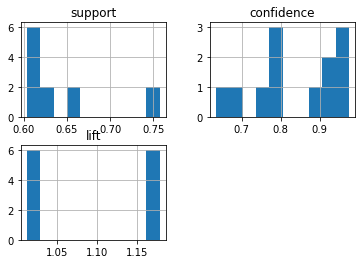

In [13]:
rules[['support','confidence','lift']].hist()

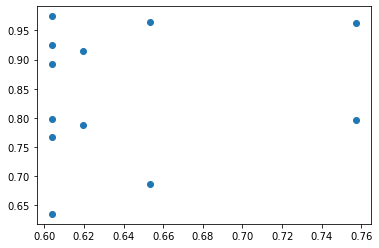

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


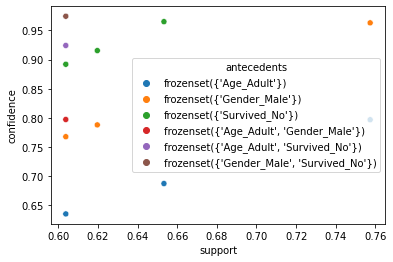

In [18]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'],rules['confidence'])
plt.show()
%matplotlib inline

import seaborn as sns
sns.scatterplot('support','confidence',data = rules,hue='antecedents')
plt.show()
